# Heart Disease Prediction using Random Forest

Random Forest is a widely-used machine learning algorithm developed by Leo Breiman and Adele Cutler, which combines the output of multiple decision trees to reach a single result. Its ease of use and flexibility have fueled its adoption, as it handles both classification and regression problems.

### Steps Involved in Random Forest Algorithm

Step 1: In the Random forest model, a subset of data points and a subset of features is selected for constructing each decision 
tree. Simply put, n random records and m features are taken from the data set having k number of records.

Step 2: Individual decision trees are constructed for each sample.

Step 3: Each decision tree will generate an output.

Step 4: Final output is considered based on Majority Voting or Averaging for Classification and regression, respectively.

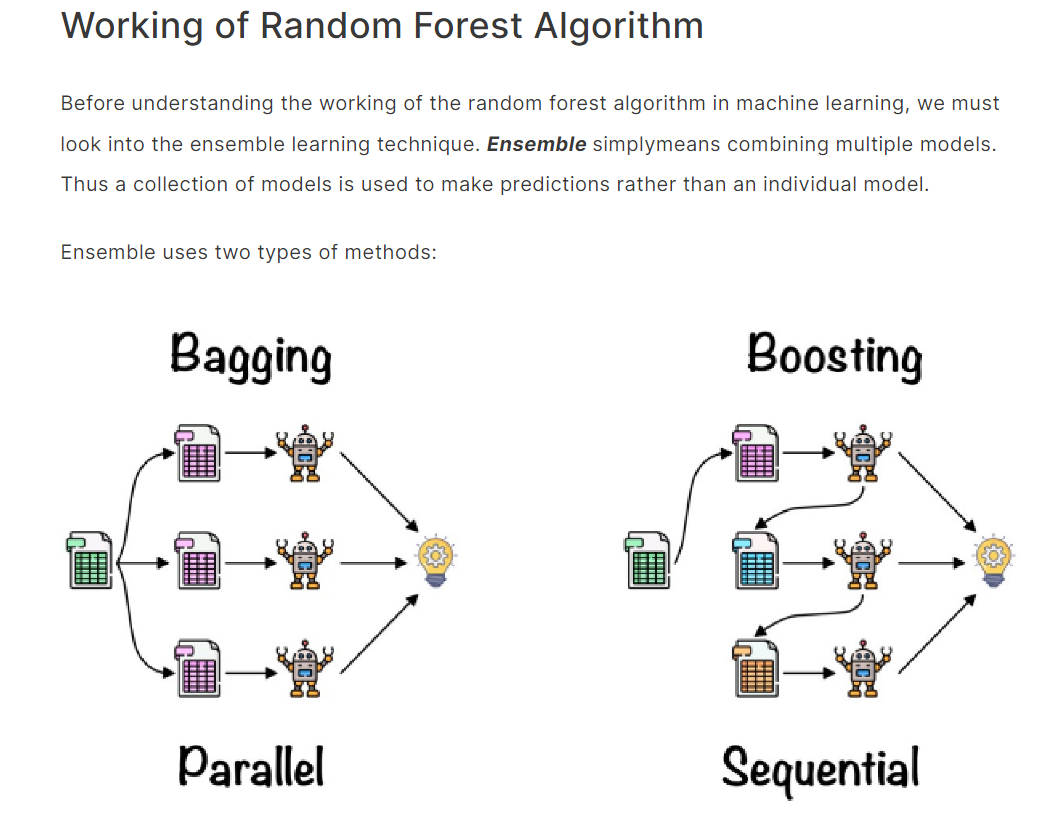

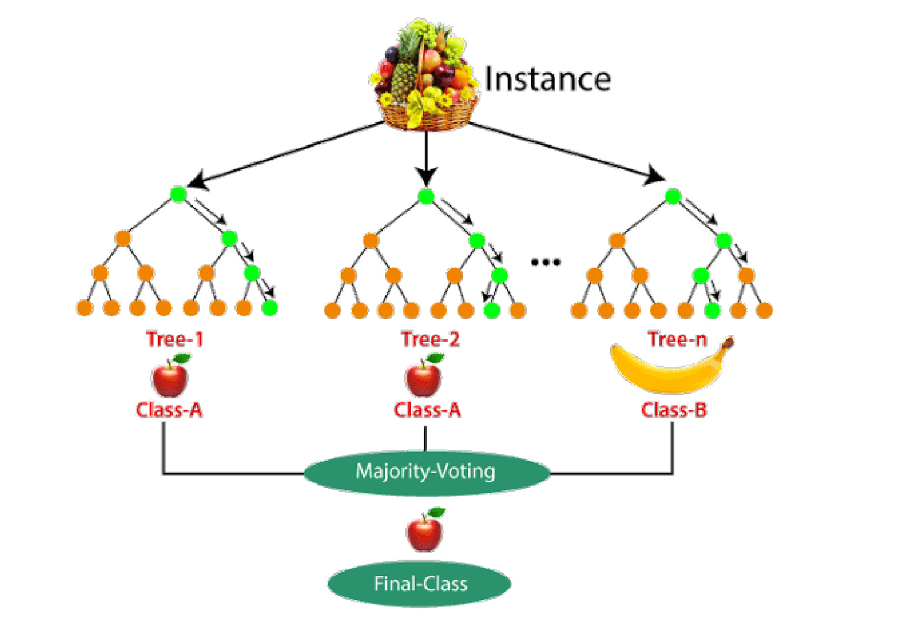

### Important Hyperparameters in Random Forest

Hyperparameters are used in random forests to either enhance the performance and predictive power of models or to make the model faster.

### Increase the Predictive Power

n_estimators: Number of trees the algorithm builds before averaging the predictions.

max_features: Maximum number of features random forest considers splitting a node.

mini_sample_leaf: Determines the minimum number of leaves required to split an internal node.

criterion: How to split the node in each tree? (Entropy/Gini impurity/Log Loss)

max_leaf_nodes: Maximum leaf nodes in each tree

### Increase the Speed

n_jobs: it tells the engine how many processors it is allowed to use. If the value is 1, it can use only one processor, but if the value is -1, there is no limit.

random_state: controls randomness of the sample. The model will always produce the same results if it has a definite value of 
random state and has been given the same hyperparameters and training data.

oob_score: OOB means out of the bag. It is a random forest cross-validation method. In this, one-third of the sample is not used to train the data; instead used to evaluate its performance. These samples are called out-of-bag samples.

In [ ]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [3]:
#importing dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('heart_v2.csv')
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [6]:
df.shape

(270, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [8]:
df.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [4]:
# Feature Variable to X and Target variable to y
X = df.drop('heart disease',axis=1)
# Putting response variable to y
y = df['heart disease']

In [5]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

In [10]:
#importing the rfc and fitting the data
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)


classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [11]:
# checking the oob score
classifier_rf.oob_score_

0.656084656084656

In [13]:
#Hyper parameter tuning using GridSearchCV
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [14]:
grid_search.best_score_

0.6985815602836879

In [15]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=10,
                       n_jobs=-1, random_state=42)

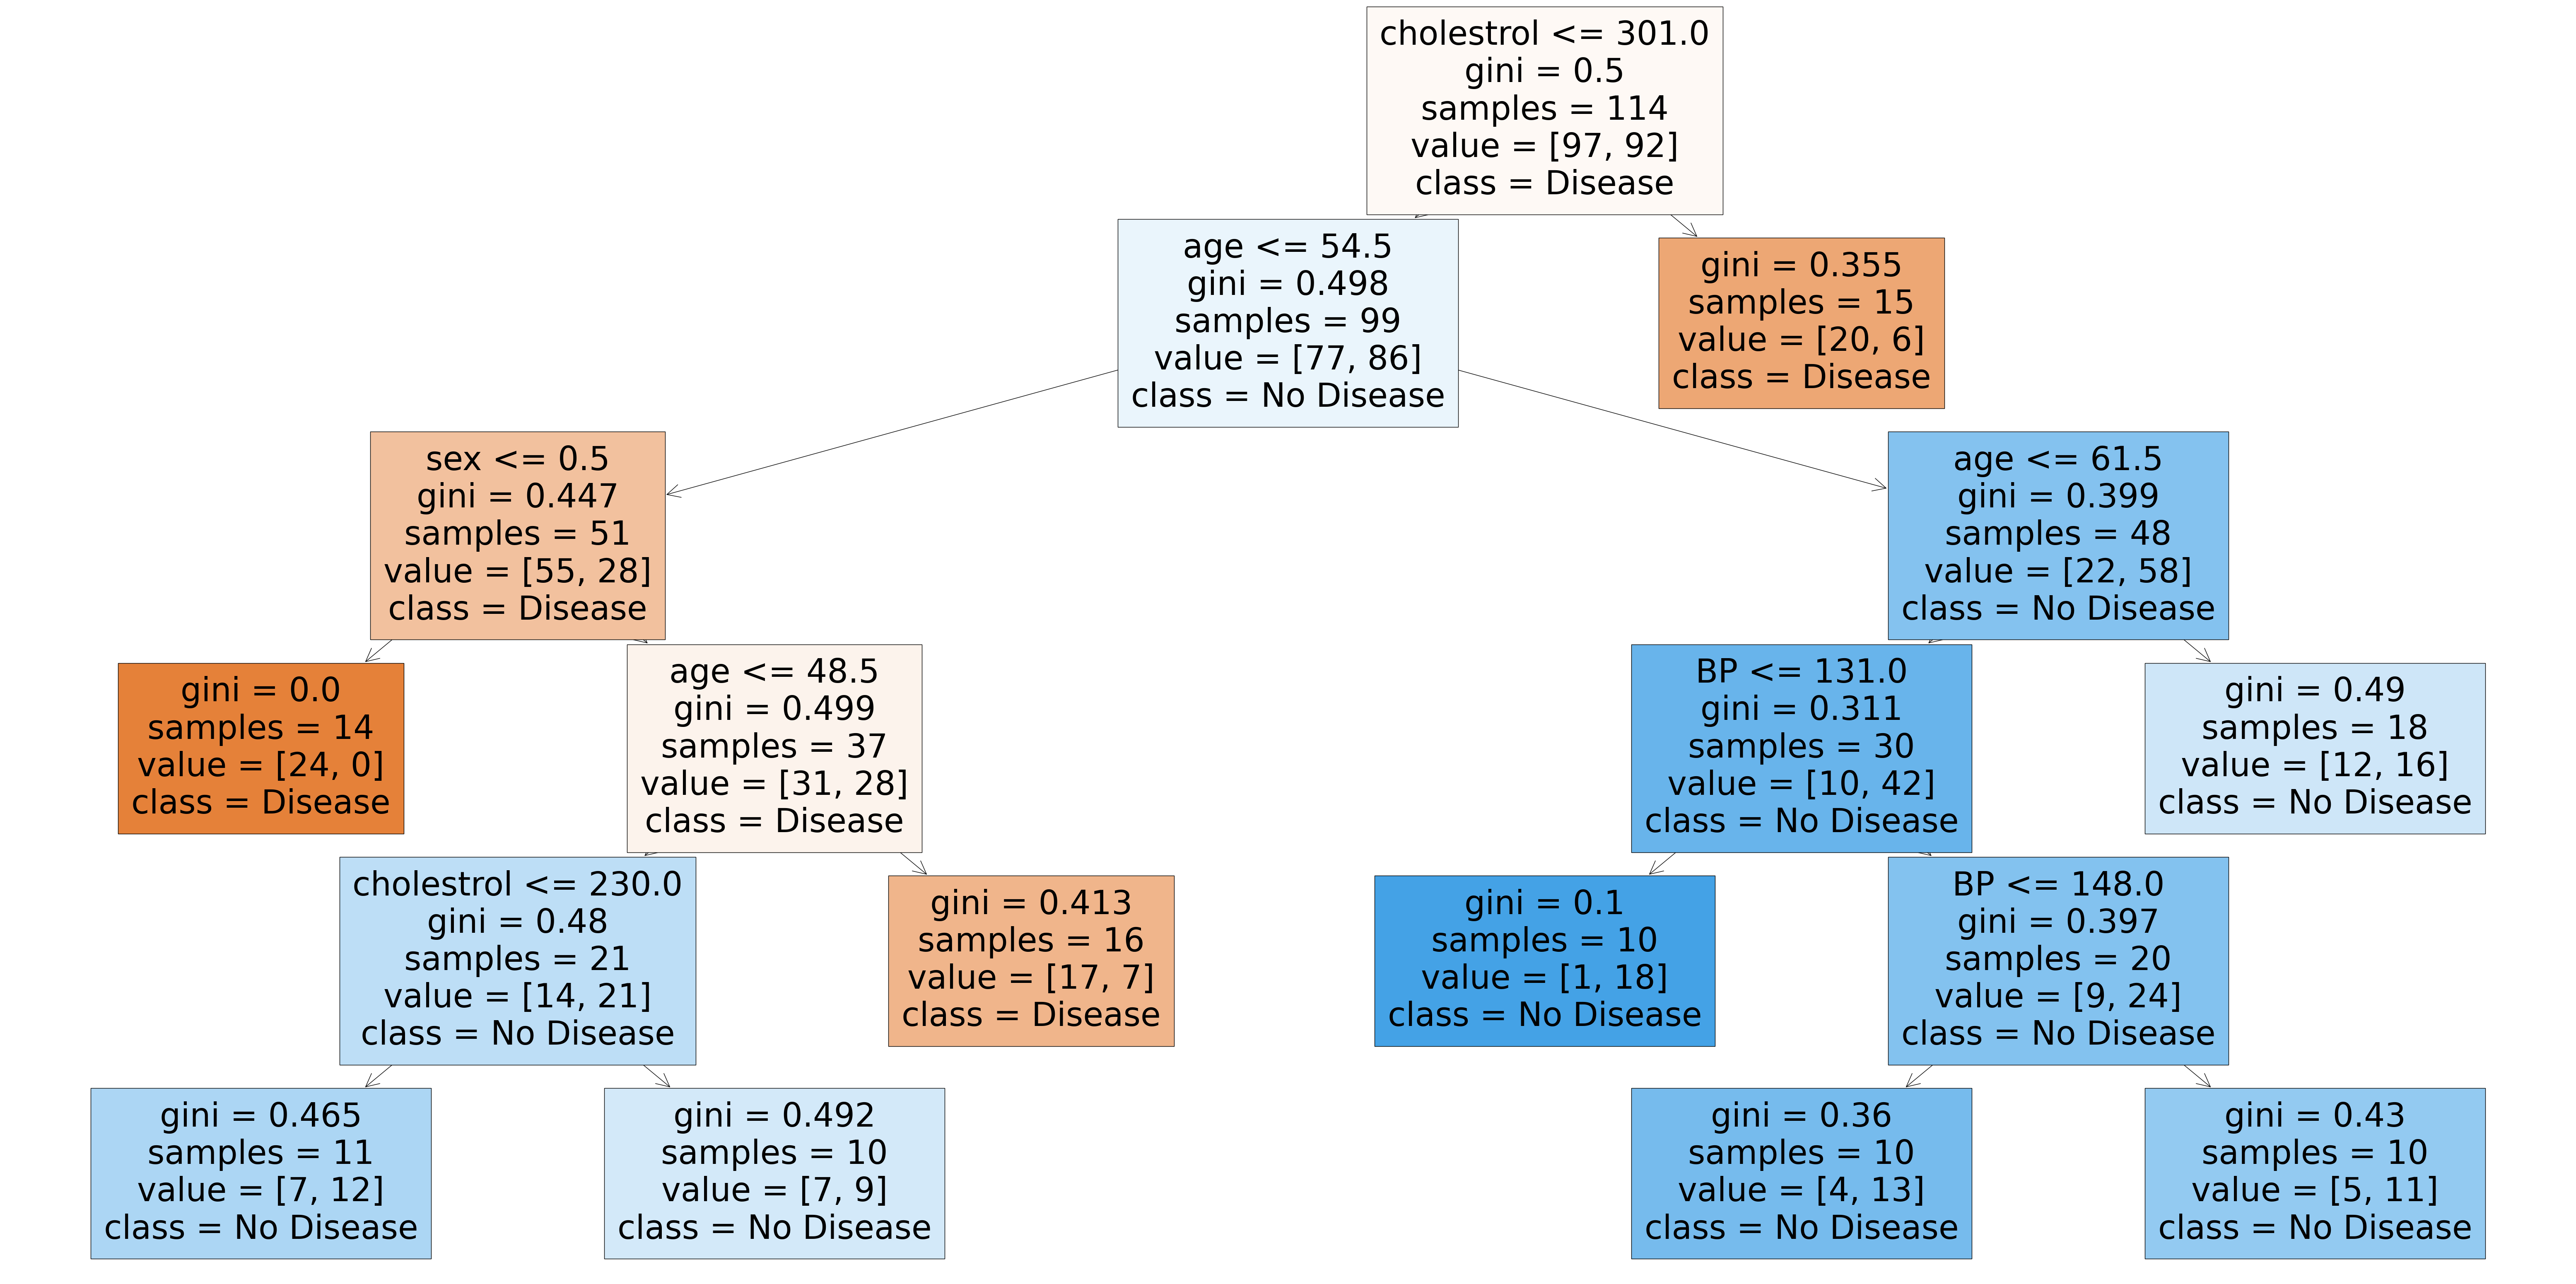

In [16]:
#visualize
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

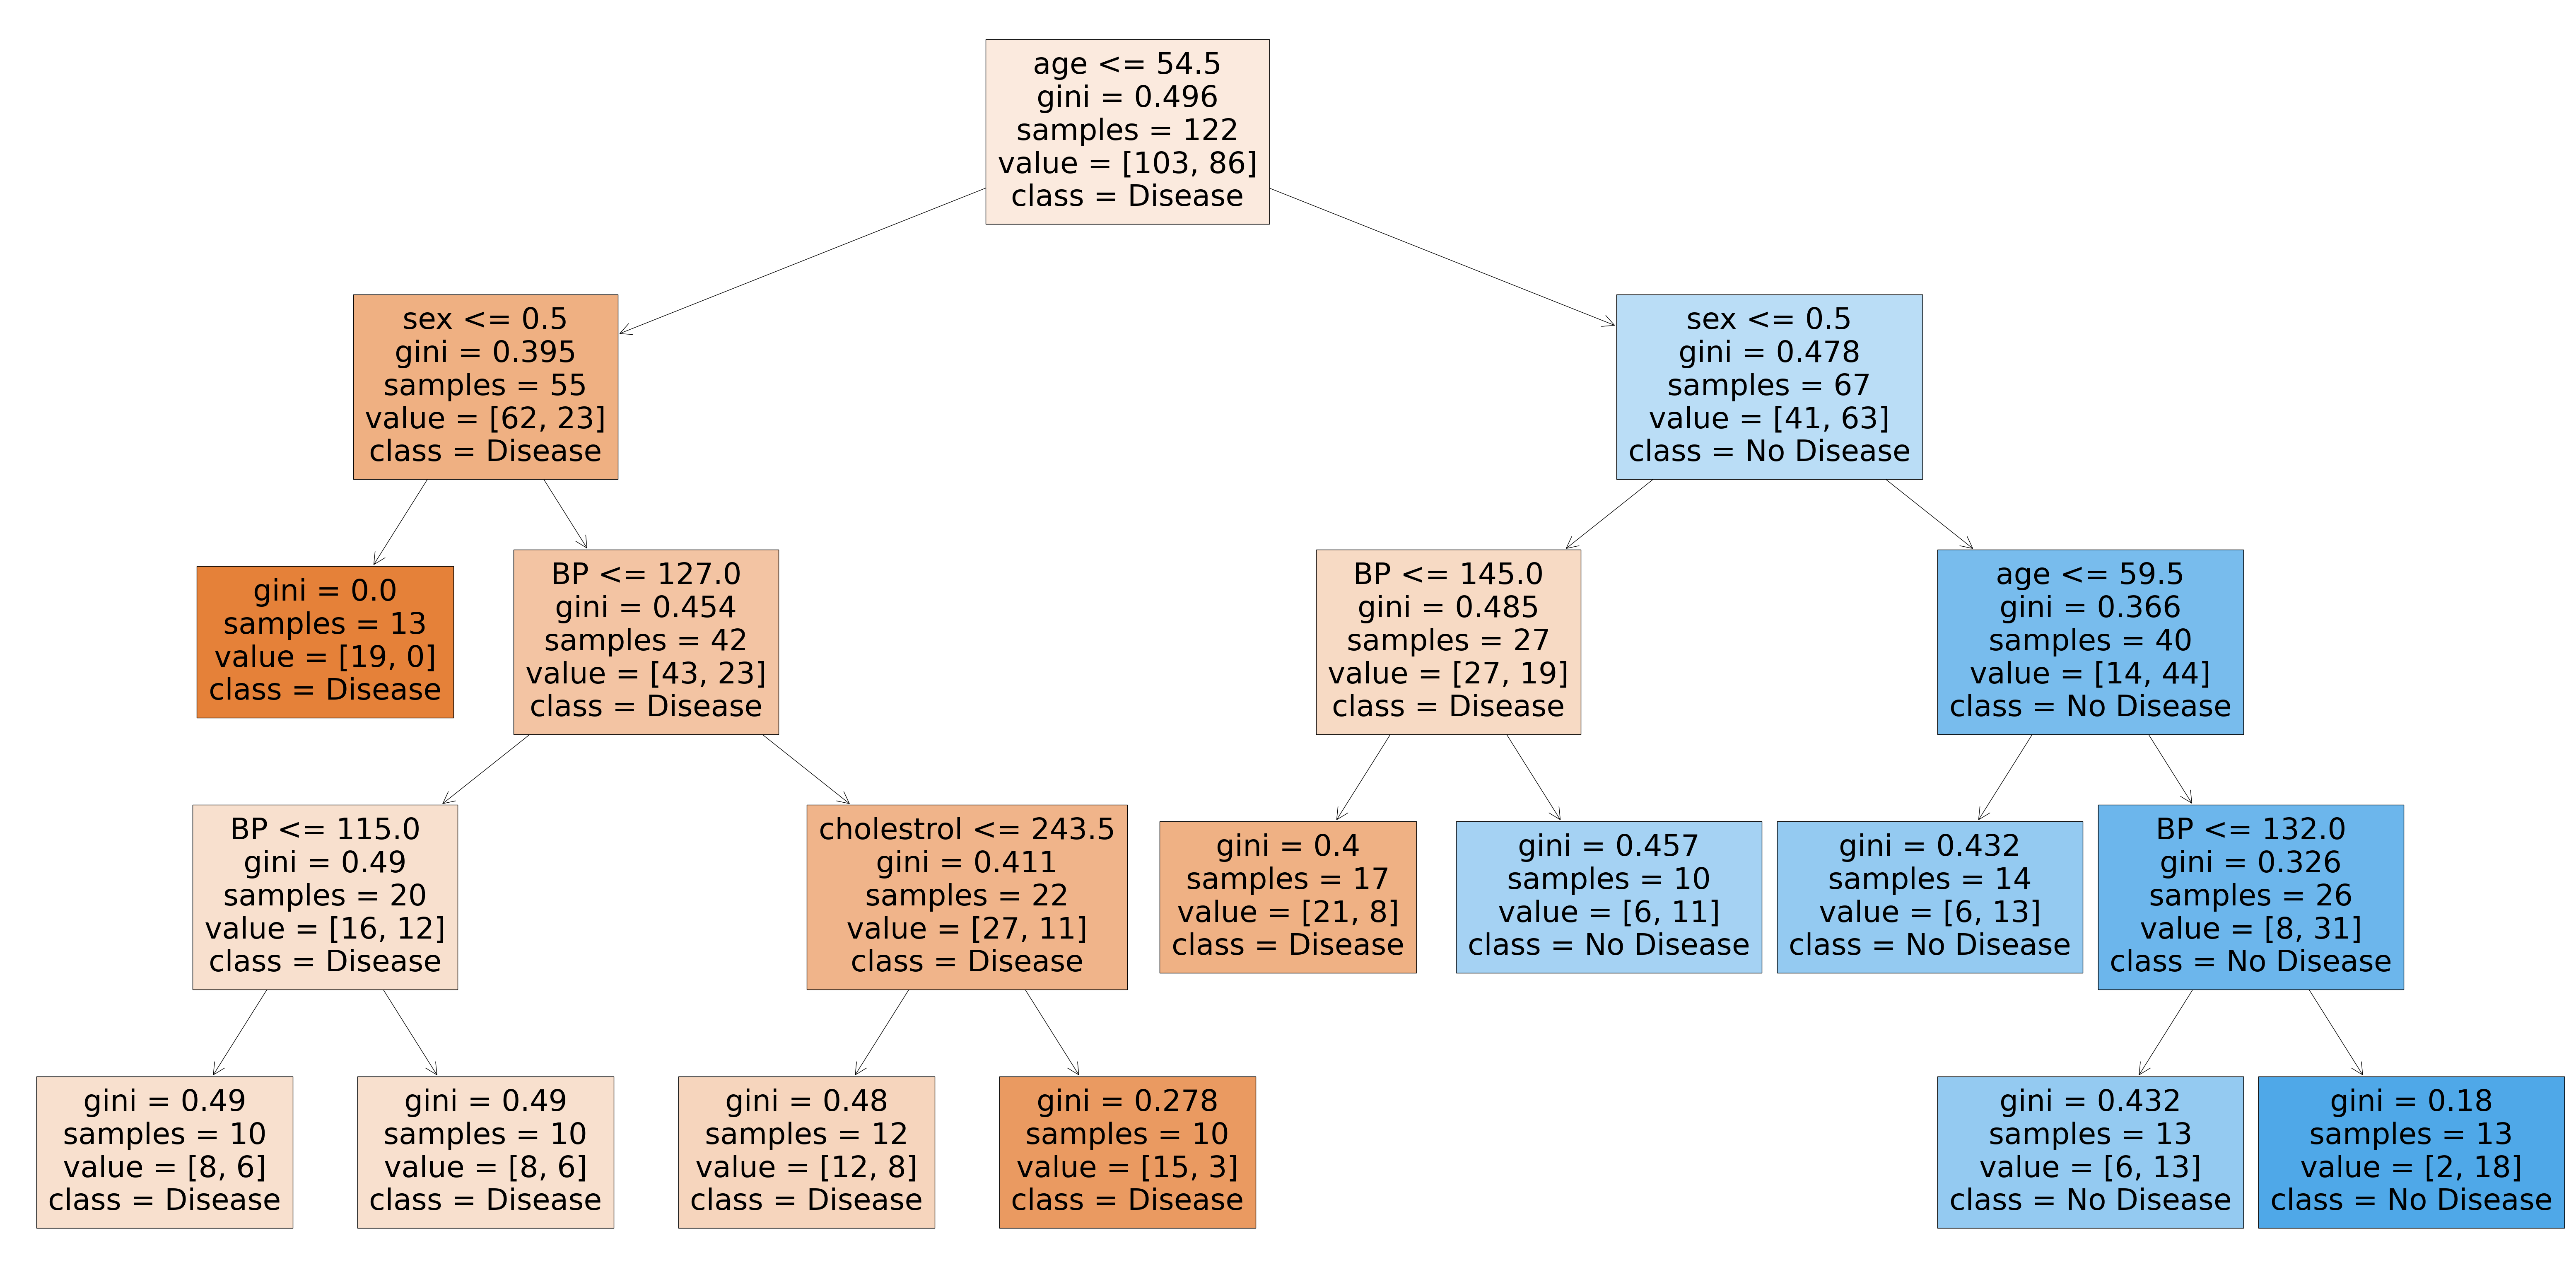

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

In [18]:
rf_best.feature_importances_

array([0.46128487, 0.2180848 , 0.13174619, 0.18888413])

In [19]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,age,0.461285
1,sex,0.218085
3,cholestrol,0.188884
2,BP,0.131746
